<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/guia_7_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate

Ejercicio 1.

Para cada uno de los conjuntos de datos dados, calcular el polinomio $p(x)$ interpolador de grado menor o igual que 3:


 a) en la forma de Lagrange,

 b) por coeficientes indeterminados,

 c) utilizando diferencias divididas.

Verificar los resultados en Python, utilizando el comando np.polyfit. Graficar el polinomio interpolador, usando np.polyval.

$x$ $-1$ $0$ $2$ $3$

$y$ $-1$ $3$ $11$ $27$



$x$ $-1$ $0$ $1$ $2$

$y$ $-3$ $1$ $1$ $3$

[-1.  4.  0.  1.]


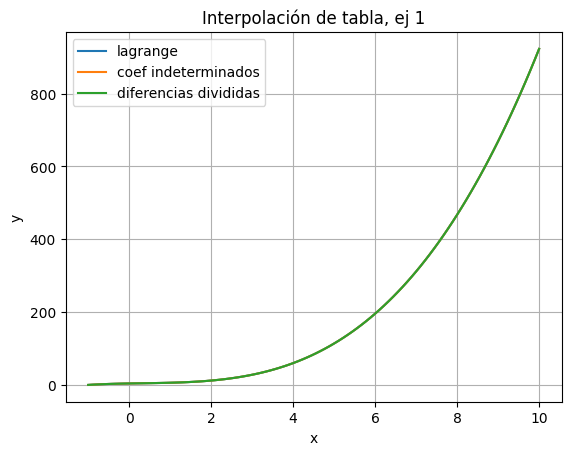

In [2]:
#A
def productoria(Xs,i,X_Eval):
    producto = 1
    for j in range (0,len(Xs)):
       if j != i:
           pol = (X_Eval - Xs[j])/(Xs[i] - Xs[j])
           producto = producto*pol
    return producto

def polinomio_lagrange(Xs,Ys,X_Eval): #este codigo devuelve al polinomio interpolador de lagrange evaluado en un punto
    listasuma = []
    for i in range (0,len(Xs)):
       sumatoria =  productoria(Xs,i,X_Eval)*Ys[i]
       listasuma.append(sumatoria)
    return sum(listasuma)

#B
def coeficientes_indeterminados(x,y,n): #n es el grado del polinomio
  A = np.vander(x,n+1) #tiene n+1 columnas porque tiene n+1 coeficientes
  coef = np.linalg.solve(A,y)
  return coef


#C
def diferencias_divididas(x,y):
    n = len(x)
    tabla = np.zeros((n,n))
    tabla[:,0] = y # la primera columna es la f(x_i), 1<i<n
    for j in range(1,n): #el j itera sobre las columnas, arranco en 1 porque la 0 ya la sé
        for i in range(j,n): #la matriz es LOWER
            tabla[i][j] = (tabla[i][j-1]-tabla[i-1][j-1])/(x[i] - x[i-j])
    return tabla

def polinomio_hermite(A,x,x_eval): #le metes la matriz de diferencias divididas (o la de hermite), los valores de x y un x_eval para evaluar al polinomio
  coeficientes = np.diag(A)
  print(coeficientes)
  evaluacion_total = coeficientes[0]
  producto = 1
  for i in range(1,len(coeficientes)):
    producto = producto*(x_eval-x[i-1])
    evaluacion_total += coeficientes[i]*producto
  return evaluacion_total

x = np.array([-1, 0, 2, 3])
y = np.array([-1, 3, 11, 27])
#Vamos a ver si generan el mismo grafico
A = diferencias_divididas(x,y)
x_graf = np.linspace(-1,10,100)
plt.plot(x_graf,polinomio_lagrange(x,y,x_graf),label="lagrange")
plt.plot(x_graf,np.poly1d(coeficientes_indeterminados(x,y,3))(x_graf),label ="coef indeterminados")
plt.plot(x_graf,polinomio_hermite(A,x,x_graf),label = "diferencias divididas")
plt.title('Interpolación de tabla, ej 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
#funcionan todos OK
